<center> Choose Bucket using fieldler vector on largest connected component </center>
---

In [1]:
# First Import the libraries needed;

# basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
%matplotlib inline
sns.set_style("whitegrid")
from IPython.core.display import display, HTML

import sys
sys.path.append('../../')

# proalign libraries
import string_db
import interface
import organism
import align
import constants as cs

In [2]:
# basic percent generator if is number
def as_percent(v, precision='0.2'):  
    """Convert number to percentage string."""
    try:
        return "{{:{}%}}".format(precision).format(float(v))
    except:
        return v

In [3]:
%%capture
# Initialization:

# organism names and IDs
organism_ids = ['4932', '7227', '9606']
organism_names = ['yeast', 'fly', 'human']

organism_ids = ['4932', '7227']
organism_names = ['yeast', 'fly']

# read organism PPI networks
organism_objs = [x for x in map(string_db.parse_organism, organism_ids)]

In [4]:
# a function to run an alignment and return the results (make sure to update constants if needed)
def alignment_result(orgs, align_method, similarity_mode='raw_blast'):
    # sort ids
    orgs.sort()
    
    # get Organism network objects
    orgobjs = [organism_objs[organism_ids.index(x)] for x in orgs]

    # create the combined biological alignment network
    bio_net = organism.BioNet(orgobjs[0], orgobjs[1], similarity_mode)
    
    # create aligner object
    aligner = align.Aligner(align_method)
    
    # align the networks
    aligner.align(bio_net)
    
    # create a dictionary for the results and fill
    results = {}
    results['CE'] = aligner.ce
    results['EC'] = aligner.ec
    results['LCCS'] = aligner.lccs
    results['ICS'] = aligner.ics
    results['S^3'] = aligner.s3
    # results['GOC'] = aligner.GOC
    # results['PWS1'] = aligner.PWS1
    # results['PWS2'] = aligner.PWS2
    # results['NBS'] = aligner.nbs
    results['Frobenius Norm'] = aligner.frobenius
    
    # return all results
    return results

## Algorithms Comparison:

Let's see how different algorithms score on various datasets:

---

In [5]:
%%capture
# Now that we have all required initial setups let's gather some information:

# our main algorithms constants:
cs.SEED_KEEP_RATIO = 0.3
cs.MAX_SEED_SIZE = 1400
# cs.SEED_PR_ALPHA

# algorithm selection
other_algs = ['isoN', 'NETAL', 'pinalog', 'CGRAAL', 'GRAAL', 'MIGRAAL', 'HubAlign', 'MAGNA', 'PROPER',
        'SPINAL-I', 'SPINAL-II']

other_alg_dfs = {}

# ignore PWS2
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'GOC', 'PWS1', 'NBS']

columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'Frobenius Norm']

for i1 in range(len(organism_ids)):
    for i2 in range(i1 + 1, len(organism_ids)):
        name = '{}-{}'.format(organism_names[i1], organism_names[i2])

        # organism selestion:
        orgs = [organism_ids[i1], organism_ids[i2]]

        # a list to store all data in
        data = []

        for alg in other_algs:
            aln = alignment_result(orgs, alg)
            data.append(aln)

        df = pd.DataFrame(data=data, index=other_algs, columns=columns)
        other_alg_dfs[name] = df

In [6]:
# Or view all scores combined:

net_names = ['yeast-fly', 'yeast-human', 'fly-human']
net_names = ['yeast-fly']
pd.concat([other_alg_dfs[x] for x in net_names], axis=0, keys=net_names)

CE        EC  LCCS       ICS       S^3  Frobenius Norm
yeast-fly isoN        6990  0.509512   544  0.774429  0.443669      172.232401
          NETAL        212  0.015453    35  0.010716  0.006368      253.373242
          pinalog     9400  0.685181   731  0.561898  0.446598      165.402539
          CGRAAL      5688  0.414607   661  0.273857  0.197493      216.041663
          GRAAL       5944  0.433268   210  0.342357  0.236464      213.658606
          MIGRAAL     5925  0.431883   549  0.305870  0.218112      213.836386
          HubAlign    8605  0.627232   224  0.414319  0.332458      187.098904
          MAGNA         95  0.006925    17  0.005149  0.002962      262.766056
          PROPER     10039  0.731759   771  0.525437  0.440578      161.027948
          SPINAL-I    9690  0.706320   737  0.489147  0.406477      167.056877
          SPINAL-II   9549  0.696042   806  0.478575  0.395846      171.318417

## TopoAlign previous algorithms
---

In [7]:
%%capture
# Now that we have all required initial setups let's gather some information:

# our main algorithms constants:
cs.SEED_KEEP_RATIO = 0.3
cs.MAX_SEED_SIZE = 1400
# cs.SEED_PR_ALPHA

# algorithm selection
topo_algs = ['seedexsingle', 'seedexsingle-jac', 'seedexsingle-ada']

topo_dfs = {}

# ignore PWS2
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'GOC', 'PWS1', 'NBS']

columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'Frobenius Norm']

for i1 in range(len(organism_ids)):
    for i2 in range(i1 + 1, len(organism_ids)):
        name = '{}-{}'.format(organism_names[i1], organism_names[i2])

        # organism selestion:
        orgs = [organism_ids[i1], organism_ids[i2]]

        # a list to store all data in
        data = []

        for alg in topo_algs:
            aln = alignment_result(orgs, alg)
            data.append(aln)

        df = pd.DataFrame(data=data, index=topo_algs, columns=columns)
        topo_dfs[name] = df

In [8]:
# Or view all scores combined:
print('Main parameteres: SEED_KEEP_RATIO: {}, BUCKET_SIZE: {}'.format(
      cs.SEED_KEEP_RATIO, cs.MAX_SEED_SIZE, cs.SEED_PR_ALPHA))

net_names = ['yeast-fly', 'yeast-human', 'fly-human']
net_names = ['yeast-fly']
pd.concat([topo_dfs[x] for x in net_names], axis=0, keys=net_names)

Main parameteres: SEED_KEEP_RATIO: 0.3, BUCKET_SIZE: 1400


CE        EC  LCCS       ICS       S^3  \
yeast-fly seedexsingle      10464  0.762738   793  0.508208  0.438834   
          seedexsingle-jac  10053  0.732779   800  0.488436  0.414591   
          seedexsingle-ada  10381  0.756688   783  0.504716  0.434242   

                            Frobenius Norm  
yeast-fly seedexsingle          166.042163  
          seedexsingle-jac      170.921034  
          seedexsingle-ada      167.038918

---

## Parameter Comparison (Organisms: Yeast-Fly)

Now Let's compare different parameters from our own algorithm:


### bucket size & keep ratio
---


In [9]:
%%capture

# list of our algorithms
our_algs = ['seedexSLE', 'seedexSLE-jac', 'seedexSLE-ada']


# list of constants to compare:
bucket_size = [800, 1000, 1200, 1400]
keep_ratio = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
pagerank_alpha = [0.85]

# ignore PWS2
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'GOC', 'PWS1', 'NBS']
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'Frobenius Norm']

# organism selestion:
orgs = ['4932', '7227']

alldfs1 = []

'''
for alpha in pagerank_alpha:
    cs.SEED_PR_ALPHA = alpha
    alpha_dfs = []
'''
    
for alg in our_algs:
    alg_dfs = []

    for bs in bucket_size:
        cs.MAX_SEED_SIZE = bs
        data = []

        for kr in keep_ratio:
            cs.SEED_KEEP_RATIO = kr
            aln = alignment_result(orgs, alg)
            data.append(aln)

        df = pd.DataFrame(data=data, index=['keep ratio: {}'.format(x) for x in keep_ratio], columns=columns)

        alg_dfs.append(df)

    cdfs1 = pd.concat(alg_dfs, axis=0, keys=['bucket size: {}'.format(x) for x in bucket_size])
    alldfs1.append(cdfs1)

calldfs1 = pd.concat(alldfs1, axis=0, keys=our_algs)

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(calldfs1)

CE        EC  LCCS  \
seedexSLE     bucket size: 800  keep ratio: 0.1   9390  0.684452   381   
                                keep ratio: 0.2   4811  0.350682   405   
                                keep ratio: 0.3   7831  0.570814   363   
                                keep ratio: 0.4   6180  0.450470   259   
                                keep ratio: 0.5   6187  0.450980   520   
                                keep ratio: 0.6   5617  0.409432   229   
                                keep ratio: 0.7   4492  0.327429   376   
              bucket size: 1000 keep ratio: 0.1   9392  0.684598   759   
                                keep ratio: 0.2   9803  0.714556   749   
                                keep ratio: 0.3   9767  0.711932   780   
                                keep ratio: 0.4   9330  0.680079   733   
                                keep ratio: 0.5   9301  0.677965   737   
                                keep ratio: 0.6   9087  0.662366   665   
                                keep ratio: 0.7   8612  0.627743   607   
              bucket size: 1200 keep ratio: 0.1  10051  0.732634   761   
                                keep ratio: 0.2  10231  0.745754   741   
                                keep ratio: 0.3  10102  0.736351   771   
                                keep ratio: 0.4  10138  0.738975   770   
                                keep ratio: 0.5   9574  0.697864   719   
                                keep ratio: 0.6   9295  0.677528   700   
                                keep ratio: 0.7   9107  0.663824   666   
              bucket size: 1400 keep ratio: 0.1  10181  0.742109   686   
                                keep ratio: 0.2  10261  0.747941   714   
                                keep ratio: 0.3  10324  0.752533   782   
                                keep ratio: 0.4  10286  0.749763   775   
                                keep ratio: 0.5   9851  0.718055   769   
                                keep ratio: 0.6   9114  0.664334   704   
                                keep ratio: 0.7   8706  0.634594   646   
seedexSLE-jac bucket size: 800  keep ratio: 0.1   6516  0.474962   821   
                                keep ratio: 0.2   4013  0.292514   501   
                                keep ratio: 0.3   4329  0.315548   296   
                                keep ratio: 0.4   6521  0.475326   194   
                                keep ratio: 0.5   7652  0.557767   250   
                                keep ratio: 0.6   4346  0.316787   241   
                                keep ratio: 0.7   7253  0.528683   251   
              bucket size: 1000 keep ratio: 0.1   8814  0.642467   801   
                                keep ratio: 0.2   9076  0.661564   735   
                                keep ratio: 0.3   8438  0.615059   713   
                                keep ratio: 0.4   8334  0.607479   574   
                                keep ratio: 0.5   7337  0.534806   740   
                                keep ratio: 0.6   5545  0.404184   462   
                                keep ratio: 0.7   5847  0.426197   618   
              bucket size: 1200 keep ratio: 0.1   9567  0.697354   827   
                                keep ratio: 0.2   9730  0.709235   784   
                                keep ratio: 0.3   9688  0.706174   789   
                                keep ratio: 0.4   9391  0.684525   777   
                                keep ratio: 0.5   9159  0.667614   799   
                                keep ratio: 0.6   8823  0.643123   652   
                                keep ratio: 0.7   8763  0.638749   644   
              bucket size: 1400 keep ratio: 0.1   9560  0.696844   860   
                                keep ratio: 0.2   9707  0.707559   825   
                                keep ratio: 0.3   9905  0.721991   790   
                                keep ratio: 0.4  10010  0.729645   806   
                                keep ratio: 0.5   9712  



### bucket size & seed size
---

In [11]:
%%capture

# list of our algorithms
our_algs = ['seedexSLE', 'seedexSLE-jac', 'seedexSLE-ada']

# list of constants to compare:
bucket_size = [800, 1000, 1200, 1400]
seed_size = [100, 200, 300, 400, 500, 600, 700, 800]
pagerank_alpha = [0.85]

# ignore PWS2
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'GOC', 'PWS1', 'NBS']
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'Frobenius Norm']

# organism selestion:
orgs = ['4932', '7227']

alldfs2 = []

for alpha in pagerank_alpha:
    cs.SEED_PR_ALPHA = alpha
    alpha_dfs = []
    
    for alg in our_algs:
        dfs2 = []
        for bs in bucket_size:
            cs.MAX_SEED_SIZE = bs
            data = []
            for ss in seed_size:
                cs.SEED_KEEP_RATIO = ss / bs
                aln = alignment_result(orgs, alg)
                data.append(aln)

            df = pd.DataFrame(data=data,
                              index=['seed size: {}'.format(x) for x in seed_size],
                              columns=columns)

            dfs2.append(df)

        cdfs2 = pd.concat(dfs2, axis=0, keys=['bucket size: {}'.format(x) for x in bucket_size])
        alldfs2.append(cdfs2)

calldfs2 = pd.concat(alldfs2, axis=0, keys=our_algs)

In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(calldfs2)

CE        EC  LCCS  \
seedexSLE     bucket size: 800  seed size: 100   6500  0.473795   432   
                                seed size: 200   6332  0.461550   309   
                                seed size: 300   6736  0.490998   147   
                                seed size: 400   6187  0.450980   520   
                                seed size: 500   4957  0.361324   264   
                                seed size: 600   5497  0.400685   444   
                                seed size: 700   6114  0.445659   202   
                                seed size: 800   5830  0.424958   343   
              bucket size: 1000 seed size: 100   9392  0.684598   759   
                                seed size: 200   9803  0.714556   749   
                                seed size: 300   9767  0.711932   780   
                                seed size: 400   9330  0.680079   733   
                                seed size: 500   9301  0.677965   737   
                                seed size: 600   9087  0.662366   665   
                                seed size: 700   8612  0.627743   607   
                                seed size: 800   8240  0.600627   646   
              bucket size: 1200 seed size: 100  10189  0.742693   776   
                                seed size: 200  10144  0.739412   671   
                                seed size: 300  10207  0.744005   791   
                                seed size: 400  10065  0.733654   744   
                                seed size: 500   9900  0.721627   736   
                                seed size: 600   9574  0.697864   719   
                                seed size: 700   9354  0.681828   697   
                                seed size: 800   9137  0.666011   671   
              bucket size: 1400 seed size: 100  10186  0.742474   762   
                                seed size: 200  10338  0.753553   703   
                                seed size: 300  10335  0.753335   715   
                                seed size: 400  10321  0.752314   765   
                                seed size: 500  10239  0.746337   762   
                                seed size: 600  10254  0.747431   775   
                                seed size: 700   9851  0.718055   769   
                                seed size: 800   9684  0.705882   734   
seedexSLE-jac bucket size: 800  seed size: 100   5631  0.410453   505   
                                seed size: 200   7831  0.570814   360   
                                seed size: 300   6993  0.509731   326   
                                seed size: 400   7652  0.557767   250   
                                seed size: 500   7574  0.552081   243   
                                seed size: 600   6508  0.474379   294   
                                seed size: 700   3143  0.229098   514   
                                seed size: 800   6526  0.475691   520   
              bucket size: 1000 seed size: 100   8814  0.642467   801   
                                seed size: 200   9076  0.661564   735   
                                seed size: 300   8438  0.615059   713   
                                seed size: 400   8334  0.607479   574   
                                seed size: 500   7337  0.534806   740   
                                seed size: 600   5545  0.404184   462   
                                seed size: 700   5847  0.426197   618   
                                seed size: 800   7078  0.515927   615   
              bucket size: 1200 seed size: 100   9708  0.707632   838   
                                seed size: 200   9673  0.705081   427   
                                seed size: 300   9631  0.702019   780   
                                seed size: 400   9532  0.694803   786   
                                seed size: 500   9376  0.683432   775   
                                seed size: 600   9159  0.667614   799   
                                seed

### Bucket - Keepratio Plot
---

/Users/alireza/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


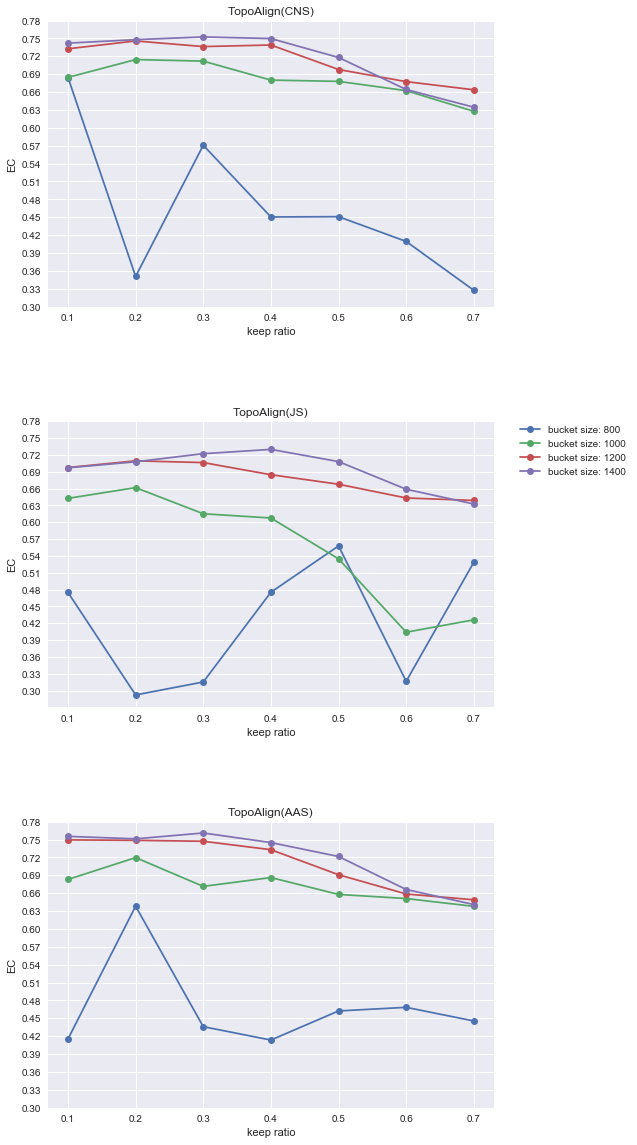

In [13]:
net_name = 'yeast-fly'

alg_names = ['TopoAlign(CNS)', 'TopoAlign(JS)', 'TopoAlign(AAS)']

# markers = ['.']*11 + ['*']*3

# colors = sns.color_palette("hls", 14)
# colors = sns.hls_palette(14, l=.4, s=.8)
# colors = sns.color_palette("husl", 14)
# colors = sns.color_palette("Dark2", 14)

fig = plt.figure(figsize=(8,20))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

for i in range(3):
#     net_name = net_names[i]
    ax = fig.add_subplot(3, 1, i+1)
    x = keep_ratio
    alg = our_algs[i]
    alg_name = alg_names[i]
    for bs in bucket_size:
        col_name = 'bucket size: {}'.format(bs)
        y = calldfs1['EC'][alg][col_name]
        ax.plot(x, y, 'o-', label=col_name)
    
    ax.set_yticks(np.arange(0.3, 0.8, 0.03))
    ax.set_xlabel('keep ratio')
    ax.set_ylabel('EC')
    ax.set_title(alg_name)
    
plt.subplot(3, 1, 2)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig("bucket-keepratio.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
# %config InlineBackend.figure_format = 'svg'


### Seed - Keepratio Plot
---

/Users/alireza/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


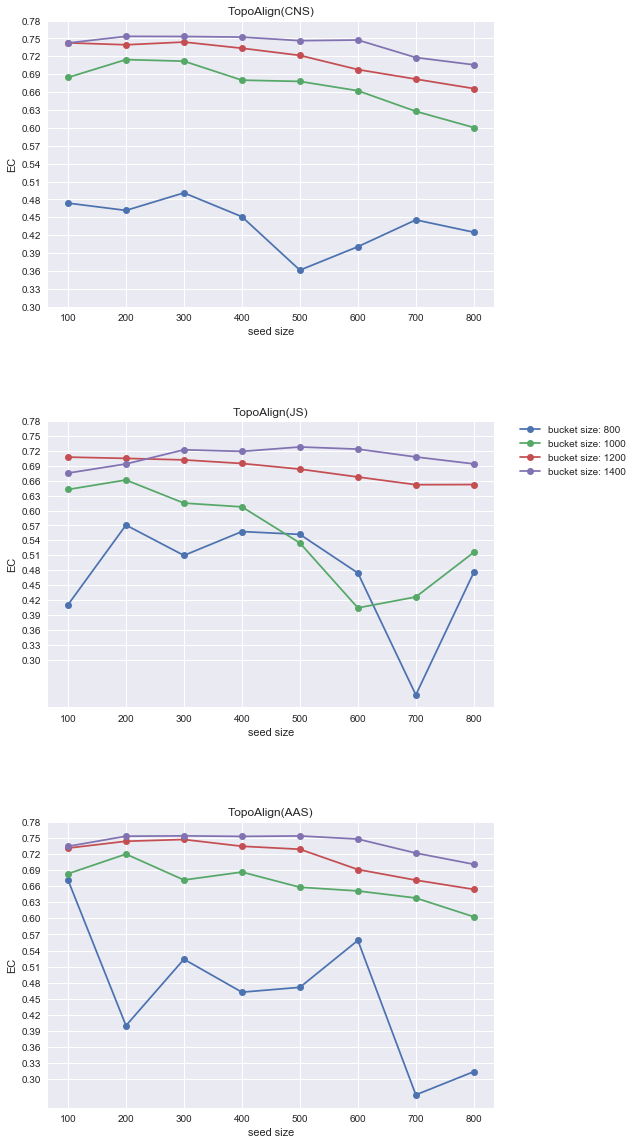

In [14]:
net_name = 'yeast-fly'

alg_names = ['TopoAlign(CNS)', 'TopoAlign(JS)', 'TopoAlign(AAS)']

# markers = ['.']*11 + ['*']*3

# colors = sns.color_palette("hls", 14)
# colors = sns.hls_palette(14, l=.4, s=.8)
# colors = sns.color_palette("husl", 14)
# colors = sns.color_palette("Dark2", 14)

fig = plt.figure(figsize=(8,20))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

for i in range(3):
#     net_name = net_names[i]
    ax = fig.add_subplot(3, 1, i+1)
    x = seed_size
    alg = our_algs[i]
    alg_name = alg_names[i]
    for bs in bucket_size:
        col_name = 'bucket size: {}'.format(bs)
        y = calldfs2['EC'][alg][col_name]
        ax.plot(x, y, 'o-', label=col_name)
    
    ax.set_yticks(np.arange(0.3, 0.8, 0.03))
    ax.set_xlabel('seed size')
    ax.set_ylabel('EC')
    ax.set_title(alg_name)

plt.subplot(3, 1, 2)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.savefig("seed-keepratio.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
# %config InlineBackend.figure_format = 'svg'

## Fieldler Vector - Node Degree Plot
---

In [49]:
%%capture
# create the combined biological alignment network
bio_net = organism.BioNet(organism_objs[0], organism_objs[1], 'raw_blast')

G1 = nx.Graph()
G1.add_nodes_from(range(bio_net.org1.node_count))
G1.add_edges_from(bio_net.org1.edges)

G2 = nx.Graph()
G2.add_nodes_from(range(bio_net.org2.node_count))
G2.add_edges_from(bio_net.org2.edges)

connected_graphs1 = list(nx.connected_component_subgraphs(G1))
connected_graphs2 = list(nx.connected_component_subgraphs(G2))

comp1 = sorted(connected_graphs1, key=len, reverse=True)[0]
comp2 = sorted(connected_graphs2, key=len, reverse=True)[0]


FV1 = nx.linalg.algebraicconnectivity.fiedler_vector(comp1)
FV2 = nx.linalg.algebraicconnectivity.fiedler_vector(comp2)

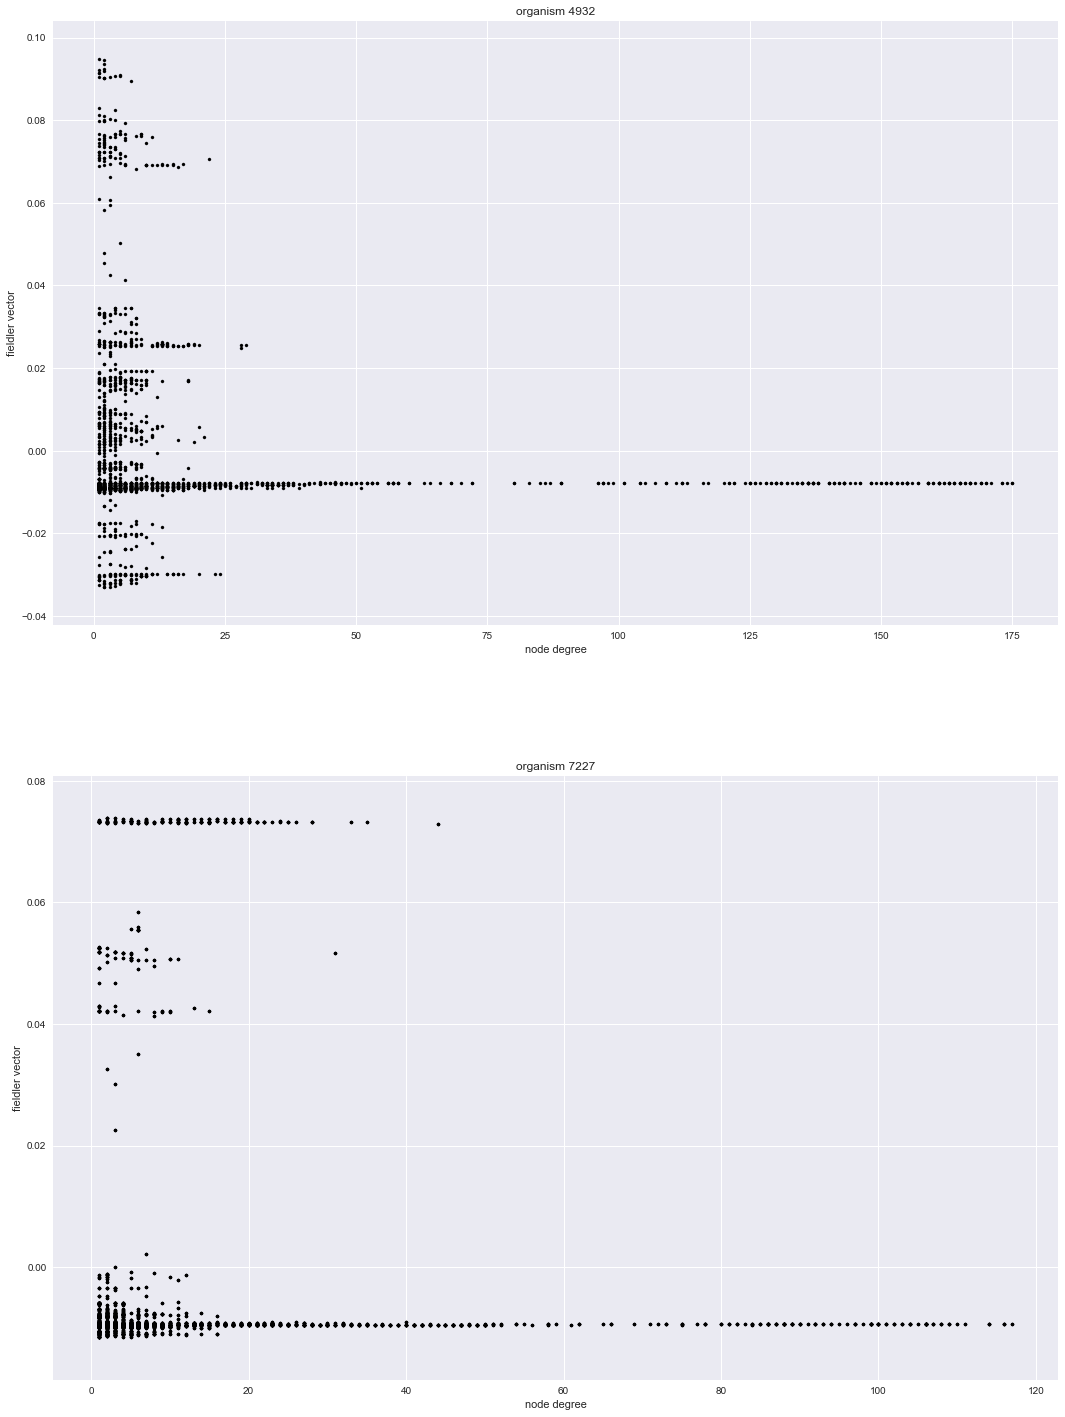

In [55]:
DEG1, VAL1 = [], []
for i in range(len(FV1)):
    VAL1.append(FV1[i])
    node = list(comp1.nodes)[i]
    DEG1.append(bio_net.org1.degree[node])
    

for i in range(len(FV2)):
    VAL2.append(FV2[i])
    node = list(comp2.nodes)[i]
    DEG2.append(bio_net.org2.degree[node])

colors = (0, 0, 0)
area = np.pi*3

plt.subplot(211)
plt.scatter(DEG1, VAL1, s=area, c=colors)

plt.title('organism 4932')
plt.ylabel('fieldler vector')
plt.xlabel('node degree')

plt.subplot(212)
plt.scatter(DEG2, VAL2, s=area ,c=colors)
plt.rcParams["figure.figsize"] = [18, 25]

plt.title('organism 7227')
plt.ylabel('fieldler vector')
plt.xlabel('node degree')


plt.subplots_adjust(hspace=0.25, wspace=0.25)
plt.savefig("fv-degree.pdf", bbox_inches='tight')
plt.show()